In [21]:
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPClassifier

In [22]:
def show_age_charges(df):
    plt.plot(df.age, df.charges,'ro')
    plt.xlabel('age')
    plt.ylabel('charges')
    plt.show()

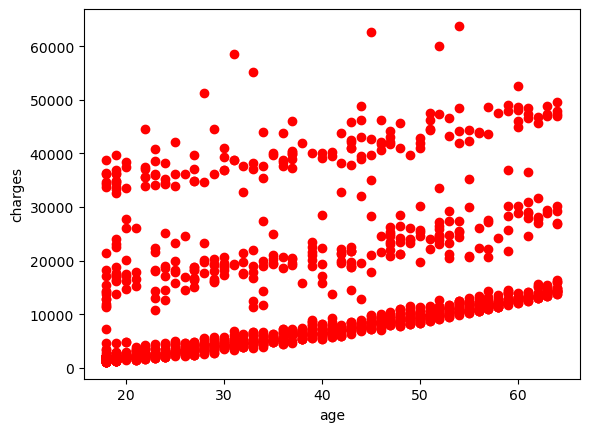

In [23]:
df = pd.read_csv("data/23.2 insurance.csv")
tmp = df[(df.children == 0) & (df.charges < 15000) & (df.sex=='female')]
show_age_charges(df)

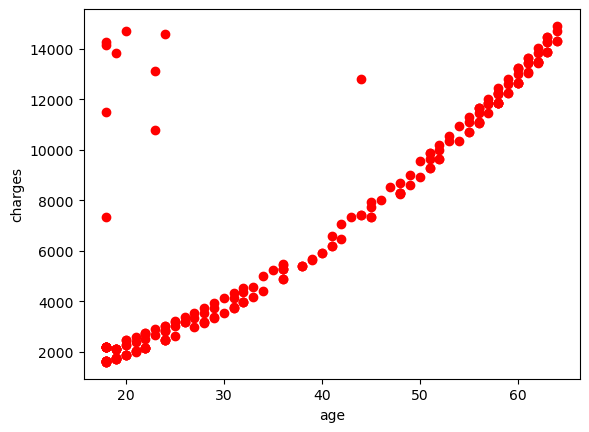

In [24]:
df_new = df[(df.children == 0) & (df.charges < 15_000) & (df.sex == "female")]
show_age_charges(df_new)

In [25]:
train, test = train_test_split(df_new, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [27]:
lr.fit(train[['age']], train.charges)


LinearRegression()

In [28]:
pred = lr.predict(test[['age']])
mean_absolute_error(test.charges, pred) # Из-за выбросов

1556.1082486960813

### Логистическая регрессия 

In [29]:
df = pd.read_csv("data/23.3 stroke_data.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,73,0,0,1,Private,1,143.509078,29.160236,formerly smoked,1
1,Female,49,0,0,1,Private,0,85.230000,25.400000,Unknown,0
2,Male,58,0,0,1,Private,0,197.174377,34.870606,formerly smoked,1
3,Female,69,0,0,1,Self-employed,1,99.680000,17.600000,formerly smoked,0
4,Male,60,0,0,1,Private,0,69.200000,30.900000,never smoked,0


In [30]:
df.stroke.value_counts()

stroke
0    2027
1    1973
Name: count, dtype: int64

In [31]:
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

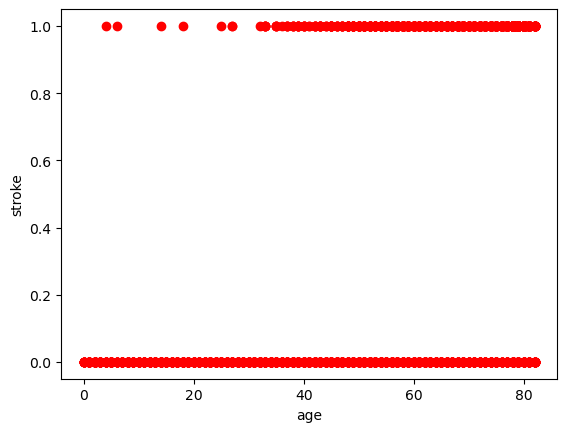

In [32]:
plt.plot(df['age'], df.stroke, 'ro')
plt.xlabel("age")
plt.ylabel('stroke')
plt.show()

In [33]:
x = df.drop(['stroke'], axis=1)
y = df.stroke


In [34]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42) 

In [35]:
logreg = LogisticRegression()


In [36]:
train_col = ['age']
logreg.fit(train_x[train_col], train_y)


LogisticRegression()

In [37]:
pred = logreg.predict(test_x[train_col])
print(accuracy_score(test_y, pred))
pred_train = logreg.predict(train_x[train_col])
print(accuracy_score(train_y, pred_train))   


0.7683333333333333
0.7667857142857143


In [38]:
print(confusion_matrix(test_y, pred))

[[448 156]
 [122 474]]


In [39]:
train_col = ['age', 'heart_disease']
logreg.fit(train_x[train_col], train_y)
pred = logreg.predict(test_x[train_col])
print(accuracy_score(test_y, pred))
print(confusion_matrix(test_y, pred))


0.785
[[457 147]
 [111 485]]


In [40]:
logreg.predict_proba(test_x[train_col])

array([[0.85219662, 0.14780338],
       [0.97878403, 0.02121597],
       [0.83988949, 0.16011051],
       ...,
       [0.94222814, 0.05777186],
       [0.99426236, 0.00573764],
       [0.9923954 , 0.0076046 ]])

In [41]:
logreg.coef_

array([[ 0.0945283 , -1.22020129]])

In [42]:
logreg.intercept_

array([-5.43853816])

In [43]:
logreg.score(train_x[train_col], train_y)

0.7725

In [44]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Нейронные сети

In [45]:
df = pd.read_csv("data/23.4 stroke_data_encoded.csv")
print(df.shape)
df.head()

(4000, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,73,0,0,1,0,1,143.509078,29.160236,0,1
1,1,49,0,0,1,0,0,85.230000,25.400000,3,0
2,0,58,0,0,1,0,0,197.174377,34.870606,0,1
3,1,69,0,0,1,1,1,99.680000,17.600000,0,0
4,0,60,0,0,1,0,0,69.200000,30.900000,1,0


In [46]:
x = df.drop(['stroke'], axis=1)
y = df.stroke

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(train_x, train_y)
pred = logreg.predict(test_x)
print(accuracy_score(test_y, pred))

0.82


c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(train_x, train_y)
pred = mlp.predict(test_x)
print(accuracy_score(test_y, pred))

0.8425


In [48]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [49]:
mlp.n_layers_

3

In [50]:
mlp = MLPClassifier(random_state=42,hidden_layer_sizes=(100, 20), activation='tanh', max_iter=500)
mlp.fit(train_x, train_y)
pred = mlp.predict(test_x)
print(accuracy_score(test_y, pred))
confusion_matrix(test_y, pred)


0.8733333333333333


array([[500, 104],
       [ 48, 548]], dtype=int64)